In [1]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score

# Machine Learning Models 
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Machine Learning Model Evaluation Methods 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix



StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 3, Finished, Available, Finished)

In [2]:
# Load data from your specific Spark table

df = spark.sql("SELECT * FROM lh_data_analysis.orange_telecom_churn_data LIMIT 1000")
display(df)

StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, bfa12b94-9a4d-4191-87e8-268968a5139c)

In [4]:
data = df.toPandas()
data.head()

StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 6, Finished, Available, Finished)

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## EDA

StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 7, Finished, Available, Finished)

Text(0.5, 1.0, 'Ratio of Customers Who churned and Who did Not')

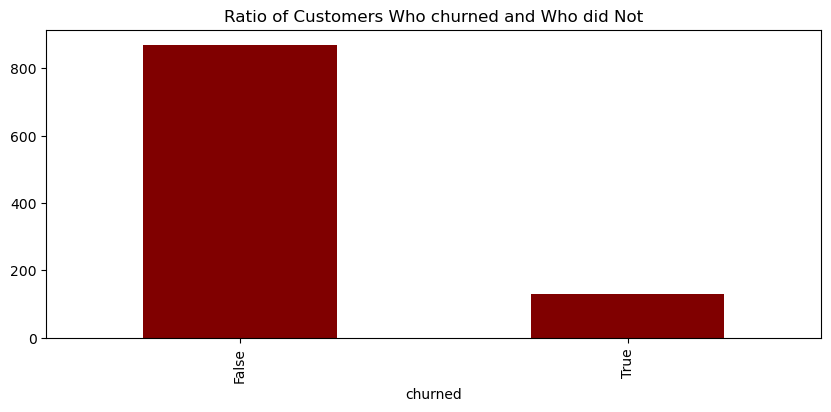

In [5]:
data.churned.value_counts().plot(kind = "bar", figsize = (10,4),color='Maroon')
plt.title("Ratio of Customers Who churned and Who did Not")

## Data Cleaning

In [6]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)
# Separating the numerical variables from the categorical variables. 
num_var=data.select_dtypes(include=[np.number])
cat_var=data.select_dtypes(include=[object])

# Convert the explanatory variable to a binary from bool
data.churned = data.churned.astype(int)

StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 8, Finished, Available, Finished)

In [7]:
# Label Binarization 
lb = LabelBinarizer()
for col in cat_var.columns: 
    data[col] = lb.fit_transform(data[col])


# Separate the label from the features 
X= [x for x in data.columns if x != 'churned']
y = data['churned']

X = data[X]
print(X.shape,y.shape)


StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 9, Finished, Available, Finished)

(1000, 17) (1000,)


## MODELLING

In [8]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 10, Finished, Available, Finished)

(700, 17) (300, 17) (700,) (300,)


In [14]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(LogisticRegression(max_iter=10000))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 16, Finished, Available, Finished)

[0.86428571 0.86428571 0.9        0.87142857 0.89285714] 0.8785714285714287


In [15]:
# classification - Random Forest 
pipe = make_pipeline(RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='gini'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 17, Finished, Available, Finished)

[0.93571429 0.9        0.94285714 0.9        0.90714286] 0.917142857142857


### Model inspection

StatementMeta(, 39ceac51-5d8a-451b-9514-70daa55d2ce9, 19, Finished, Available, Finished)

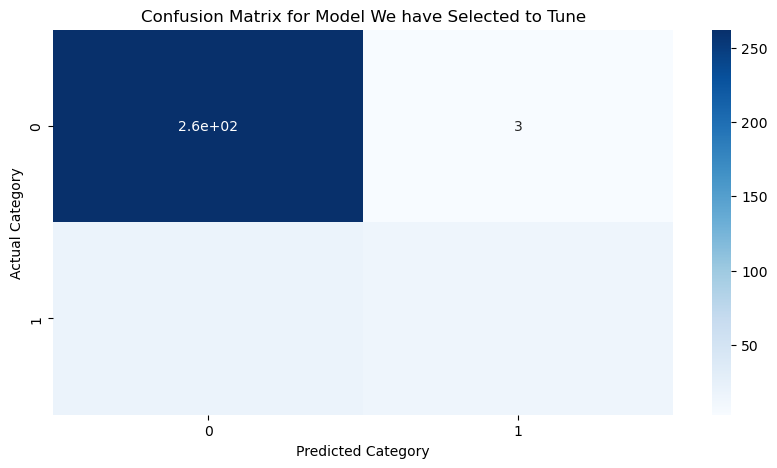

array([[262,   3],
       [ 19,  16]])

In [17]:
# Investigating whether class imbalance has impacted our models. 
model = RandomForestClassifier() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()

matrix

## PREDICT NEW CASES

In [ ]:
import mlflow 
from synapse.ml.predict import MLFlowTransformer 
 
df = spark.read.format("delta").load( 
   'abfss://c3f6eb93-37e5-4a1e-bbc4-23ec49e99623@onelake.dfs.fabric.microsoft.com/69dc2150-e138-4a5d-9088-9bea790f44cd/Tables/orange_telecom_churn_data' # Your input table filepath here
) 
 
model = MLFlowTransformer( 
    inputCols=<INPUT_COLS>, # Your input columns here
    outputCol=<OUTPUT_COLS>, # Your new column name here
    modelName=<MODEL_NAME>, # Your ML model name here
    modelVersion=<MODEL_VERSION> # Your ML model version here
) 
df = model.transform(df) 
 
df.write.format('delta').mode("overwrite").save( 
    <OUTPUT_TABLE> # Your output table filepath here
)  